In [31]:
import io
import re
import json
import string
import codecs
import itertools
import sys
import pandas as pd
import operator

In [2]:
import matplotlib.pyplot as plt
# import tensorflow as tf

In [3]:
import csv
import numpy as np

In [4]:
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [6]:
import nltk
from nltk import text
from nltk import NaiveBayesClassifier
from nltk import tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

C:\Users\Aimee\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
colnames=["index","email","label"]

In [54]:
df_sales_templates = pd.read_csv('C:/Users/Aimee/Templates_sales.csv',usecols=["email","label"])

In [55]:
df_sales_templates.tail()

,label,email
87,Other Sales Email,"{name},\r\nOne of our clients was able to [imp..."
88,Other Sales Email,"{name},\r\n\r\nI reached out previously regard..."
89,Inbound,"Hi {name},\r\n\r\nI noticed that you recently ..."
90,Inbound,"Hi {name},Thank you for signing up to test dri..."
91,Inbound,Hey {name}\r\n\r\nWhats going on?I saw that yo...


In [56]:
df_sales = pd.read_csv('C:/Users/Aimee/sales_emails.csv',usecols=["email"])
# df_sales["id"]= 1
# df_sales = pd.read_csv('C:/Users/Aimee/sales_emails.csv',names=colnames)
df1=df_sales[2400:3800]

In [57]:
df_sales.drop_duplicates("email")
df_sales["index"]=df_sales.index

In [58]:
sales_dic = df_sales.set_index('index')["email"].to_dict()
# sales_dic

In [59]:
# df_sales.drop(df_sales.index[0], inplace=True)


In [60]:
df_nonsales = pd.read_csv('C:/Users/Aimee/non_sales_emails.csv',usecols=["email","label"])

In [62]:
df2=df_nonsales[2000:2400]
df2
# df2.drop(df2.index[0], inplace=True)

,email,label
2000,"Lucy,Now that #44 is rented and you have settl...",other
2001,---------------------- Forwarded by Phillip K ...,other
2002,EOL report for TV in conference on 33Cash-Hehu...,other
2003,CashHehubChicagoPEPLKatySocalOpalPermianGas Da...,other
2004,"Cooper,Did you add some more security to the e...",other
2005,Please let me know if you still need Curve Shi...,other
2006,_____________________DAVID COURSEY____________...,other
2007,"Dear phillip,This e-mail is automated notifica...",other
2008,"[IMAGE] [IMAGE] [IMAGE] [IMAGE] $ 2,500 [I...",other
2009,"john.zufferli@enron.com, peggy.hedstrom@enron....",other


In [63]:
df_result = pd.concat([df_sales_templates, df2], axis=0,sort=False)


In [64]:
df_result['index'] = range(0, len(df_result))
df_result = df_result.drop_duplicates("email")

In [65]:
df_result['labels'] = df_result['label'].factorize()[0]
df_result = df_result.drop_duplicates("email")
df_result = df_result.dropna()
df_result

,label,email,index,labels
0,Cold Email Templates,"Hi ,My name is aimee with {Your Company,We hel...",0,0
1,Cold Email Templates,"Hi Mike,\r\n\r\nMy name is Nick and I’m a co-f...",1,0
2,Cold Email Templates,I'd like to discuss your lead gen efforts.\r\n...,2,0
3,Cold Email Templates,"Hi {name},\r\n\r\n{myName} from {myCompany} he...",3,0
4,Cold Email Templates,"Hi {name},\r\n\r\nI’m trying to figure out who...",4,0
5,Cold Email Templates,"Hello {name},\r\n\r\nWhat would it mean to you...",5,0
6,Cold Email Templates,"Hi {name},\r\n\r\nI hope this note finds you w...",6,0
7,Cold Email Templates,"{name},\r\n\r\nI am doing some research on you...",7,0
8,Cold Email Templates,"{name},\r\n\r\nI’m hoping you can help me, who...",8,0
9,Cold Email Templates,I’m sorry to trouble you. Can you tell me who ...,9,0


In [66]:
# df_result.email

In [67]:
result_dict=df_result.set_index('labels')["label"].to_dict()

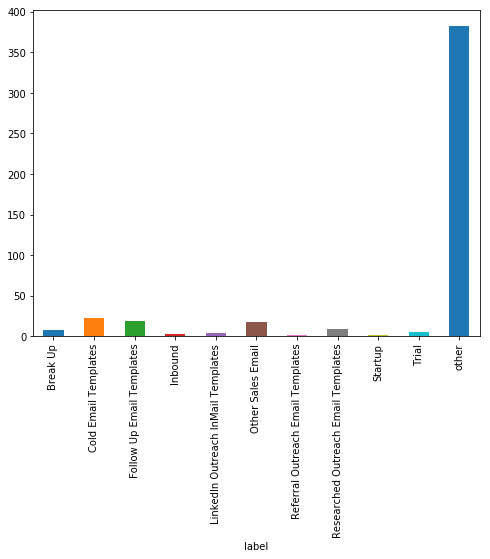

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_result.groupby('label').email.count().plot.bar(ylim=0)
plt.show()

In [69]:
# def remove_numbers(tokened_text):
#     no_digits = []
    
# # Iterate through the string, adding non-numbers to the no_digits list
#     for i in tokened_text:
#         output = re.sub(r'\d+', '',i )
#         no_digits.append(output)
#     return no_digits

# def remove_email_address(tokened_text):
#     no_com = []
    
# # Iterate through the string, adding non-numbers to the no_digits list
#     for i in tokened_text:
#         ii=i.lower()
#         if 'com' not in ii:
#             no_com.append(i)
#     return no_com

# def remove_noise(text):
#     no_noise =[]
#     for t in text:
#         if t not in noise_list:
#             no_noise.append(t)
#     return no_noise

In [70]:
noise_list = ['**********************************************************************',
              '--','...',"'s",'.//////////////////////////////////////////////',
              'simply', 'paul','hi','hello',"n't",
              'hennessy']
words_to_exclude = set(stopwords.words('english'))
exclude = set(string.punctuation)

In [71]:
def process_message(df, stem = True, gram = 2):
    clean_data_set=[]
    train_data = df_result.email
    data_arr=[]
    for e_arr in train_data:
        data_arr.append([e_arr])
    # print(data_arr)

    lower_case=[]
    for d in data_arr:
        str1 = ''.join((str(e) for e in d))
    #     print(str1.lower())
        w = word_tokenize(str1.lower())
        lower_case.append(w)
    # print(lower_case)  

    punc_free=[]
    for w in lower_case:
        punc=[]
        punc_free.append([word for word in w if word not in exclude])
#     print(punc_free)
    no_sw=[]
    for pf in punc_free:
        no_sw.append([pf1 for pf1 in pf if pf1 not in words_to_exclude])
    # print(no_sw)
    no_noise = []
    for ns in no_sw:
        no_noise.append([word for word in ns if word not in noise_list])
#     print(no_noise)
    no_email=[]
    for i in no_noise:
        no_email.append([ii for ii in i if 'com' not in ii])
#     print(no_email)*
    no_starsign=[]
    for i in no_email:
        no_starsign.append([ii for ii in i if '*' not in ii])
        
    no_starsign1=[]
    for i in no_starsign:
        no_starsign1.append([ii for ii in i if '=' not in ii])
    no_starsign2=[]
    for i in no_starsign1:
        no_starsign2.append([ii for ii in i if '/' not in ii])
    no_starsign3=[]
    for i in no_starsign2:
        no_starsign3.append([ii for ii in i if '``' not in ii])   
    no_digits = []   
    # Iterate through the string, adding non-numbers to the no_digits list
    for i in no_starsign3:
        arr = []
        for ii in i:
            output = re.sub(r'\d+', '',ii)
            arr.append(output)
        no_digits.append(arr)
#     print(no_digits)

    dataset = [w for w in no_digits if len(w) >= 0]
    pre_data=[]
    for ds in dataset:
        w_gram = []
        if gram > 1:
            for i in range(len(ds) - gram + 1):
                w_gram += [' '.join(ds[i:i + gram])]
    #     print(w_gram)
        
        stem_w = []
        if stem:
            stemmer = PorterStemmer()
            stem_w = [stemmer.stem(word) for word in w_gram]   
        pre_data.append(stem_w)
#     clean_data_set.append(pre_data)
    # print(clean_data_set)
    return pre_data

In [1]:
clean_data_set = process_message(df_result)


NameError: name 'process_message' is not defined

In [73]:
len(clean_data_set)

473

In [74]:
# clean_sales_data = process_message_sale(df_sales)
# clean_sales_data_set = []
# for i in clean_sales_data:
#     if i not in clean_sales_data_set:
#         clean_sales_data_set.append(i)
# clean_sales_data_set

In [75]:
# clean_data_test = process_message_sale(testData)

In [76]:
# from collections import defaultdict

# D = defaultdict(int)
# for word in clean_sales_data:
#     D[word] += 1


# output top 20 words

In [67]:
def select_top_k_words(words, k):
    b = np.concatenate(words).ravel()
    c_total = Counter(b)
    d = {}
    for key, value in c_total.items():
        d[key] = value
        sorted_d = sorted(d.items(), key=operator.itemgetter(1))
        top_k_words = [i[0] for i in sorted_d[:k][::-1]]
    return top_k_words

In [87]:
# top_k_words=select_top_k_words(clean_sales_data,50)

In [69]:
# clean_sales_data_set = [y for x in clean_sales_data for y in x]

# find the email which contains the top words

In [30]:
def intersect(a, b):
    return list(set(a) & set(b))

In [31]:
top_email = []
for cd in clean_sales_data:
    top_email.append(intersect(top_k_words,cd))
#     top_email = [x for x in top_email if x]
top_email_df = pd.DataFrame({'token_email':top_email,"index":df_sales.index})
# top_email_df= top_email_df.dropna(subset=['token_email'], inplace=True)
# top_email_df

# Running LDA using Bag of Words

In [82]:
dictionary = gensim.corpora.Dictionary(clean_data_set)
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_data_set]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.005*"data system" + 0.005*"systems curr" + 0.005*"platform built" + 0.005*"possible data" + 0.005*"currently market" + 0.005*"writing poss" + 0.004*"market test" + 0.004*"lead provid" + 0.004*"built lead" + 0.004*"testing unreleas"
Topic: 1 
Words: 0.010*"image imag" + 0.005*". ." + 0.003*" " + 0.003*"buy //" + 0.001*"= imag" + 0.001*"strong buy" + 0.001*". -." + 0.001*", ," + 0.001*"image =" + 0.001*"coverage initi"
Topic: 2 
Words: 0.002*" " + 0.002*". ." + 0.002*"-original messag" + 0.001*"data system" + 0.001*" -" + 0.001*"let know" + 0.001*"email cont" + 0.001*"write email" + 0.001*"use control" + 0.001*"controls past"


In [80]:
len(clean_data_set)

473

In [81]:
str_=[]
for c in clean_data_set:
    str_.append(" ".join(c))
# str_

In [119]:
df = pd.DataFrame({'email':str_,"label":df_result.label,"index":df_result.index,"labels":df_result.labels})
df = df.drop_duplicates("email")
df = df.dropna()
df.head()

,email,label,index,labels
0,name aime aimee help help specif specific typ ...,Cold Email Templates,0,0
1,mike nam name nick nick ’ ’ co-found co-founde...,Cold Email Templates,1,0
2,'d like like discuss discuss lead lead gen gen...,Cold Email Templates,2,0
3,name mynam myname mak make sal sales consist c...,Cold Email Templates,3,0
4,name ’ ’ tri trying figur figure charg charge ...,Cold Email Templates,4,0


In [133]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
# 2. FIT
enc.fit(df.labels)
new_df_features = enc.transform(df.labels)
new_df_features.reshape(-1, 1)
ohe = preprocessing.OneHotEncoder(sparse=False)
# 3. Transform
onehotlabels = ohe.fit_transform(new_df_features).toarray()
# onehotlabels.shape

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [120]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(df.label).toarray()

ValueError: could not convert string to float: 'other'

In [84]:
# trainIndex, testIndex = list(), list()
# for i in range(df.shape[0]):
#     if np.random.uniform(0, 1) < 0.75:
#         trainIndex += [i]
#     else:
#         testIndex += [i]
# trainData = df.loc[trainIndex]
# testData = df.loc[testIndex]

In [85]:
# trainData.reset_index(inplace = True)
# trainData.drop(['index'], axis = 1, inplace = True)
# trainData.drop(['label'],axis = 1, inplace = True)
# trainData.drop(['level_0'], axis = 1, inplace = True)

In [86]:
# trainData["id"].fillna(0.0).astype(int)

In [87]:
# testData['index'] = range(0, len(testData))
# testData.drop(['index'], axis = 1, inplace = True)
# testData.drop(['label'],axis = 1, inplace = True)
# testData.drop(['level_0'], axis = 1, inplace = True)


In [88]:
# testData["labels"]=testData["labels"].fillna(0.0).astype(int)
# testData["index"]=testData["index"].fillna(0.0).astype(int)

In [89]:
# testData.head()

In [90]:
# test_data_dic = testData.set_index('index')["email"].to_dict()

In [91]:
data_set_list = [y for x in clean_data_set for y in x]
# data_set_list

In [92]:
X_train, X_test, y_train, y_test = train_test_split( df.email, df.label,test_size=0.3,random_state=0)

In [93]:
X_train.shape

(326,)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = df.labels
features = tfidf.fit_transform(df.email).toarray()
features.shape
# each of the email represent 5 features

(467, 3281)

In [95]:
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [178]:
# X_train_tfidf.shape

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC
pipeline = Pipeline([
               ('vect', CountVectorizer(ngram_range=(1,3), max_df=0.02 ) ),
               ('tfidf', TfidfTransformer() ),
               ('clf', MultinomialNB()),
#                ('clf', SGDClassifier(loss='hinge', random_state=42,
#                             alpha=0.1, max_iter=5, tol=None, n_jobs=-1) ),
                ])
# np.concatenate((y_train,y_test[:,None]))
# np.concatenate(
#    (np.reshape(y_test, (,2)), np.reshape(y_train, (, 2))), 
#    axis=1
# )
# all_labels = np.hstack([y_train,y_test])
# # all_labels
# mlb = MultiLabelBinarizer().fit(all_labels)
# Y_train_binary = mlb.transform(y_train)
# Y_test_binary = mlb.transform(y_test)
# Y_train_binary.shape
# X_train=np.argmax(X_train)

In [180]:
pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.02, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        stri...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [181]:
pipeline.fit(X_train,y_train)

# # the result is also a binary label matrix
Y_preds = pipeline.predict(X_test)


In [182]:
# calculate f1 on the test set
from sklearn.metrics import f1_score
f1_score(Y_preds, y_test,average='micro')

0.8524590163934426

In [183]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, Y_preds, 
                                    target_names=df.label.unique()))

             precision    recall  f1-score   support

      sales       0.79      1.00      0.89       312
      other       1.00      0.66      0.79       237

avg / total       0.88      0.85      0.85       549



In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(loss="log",random_state=1, max_iter=1),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Aimee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Aimee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Aimee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Aimee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The mi

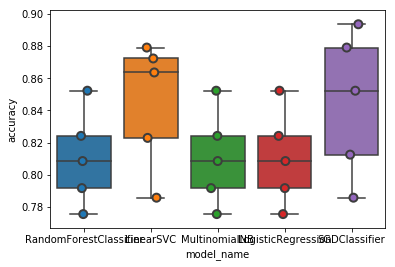

In [97]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [98]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.844746
LogisticRegression        0.810427
MultinomialNB             0.810427
RandomForestClassifier    0.810427
SGDClassifier             0.844645
Name: accuracy, dtype: float64

In [99]:
from sklearn.model_selection import train_test_split

# model = SGDClassifier(loss="log",n_jobs=10)
model=MultinomialNB()
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.33, random_state=0)
model.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

In [100]:
predict={}
index=[]
for i in range(len(y_pred2)):
    index.append(i)
    predict=dict(zip(index,y_pred2))

In [101]:
y_test2_df = pd.DataFrame({"values":y_test2.values})

In [102]:
y_test2_df = pd.DataFrame({"labels":y_test2_df.index,"values":y_test2.values})

In [107]:
model.fit(features, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [108]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test2, y_pred2, 
                                    target_names=df.label.unique()))

                                     precision    recall  f1-score   support

               Cold Email Templates       0.00      0.00      0.00        12
Researched Outreach Email Templates       0.00      0.00      0.00         2
  Referral Outreach Email Templates       0.00      0.00      0.00         5
 LinkedIn Outreach InMail Templates       0.00      0.00      0.00         4
          Follow Up Email Templates       0.00      0.00      0.00         3
                           Break Up       0.00      0.00      0.00         1
                              Trial       0.00      0.00      0.00         6
                            Startup       0.79      1.00      0.88       122

                        avg / total       0.62      0.79      0.69       155



C:\Users\Aimee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 8, does not match size of target_names, 11
  .format(len(labels), len(target_names))
C:\Users\Aimee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# classification report

In [109]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

metrics(y_test2_df["values"], predict)

ZeroDivisionError: division by zero

In [106]:
np.mean(y_pred2 == y_test2)

0.7870967741935484

# Test & Evaluation

In [202]:
texts = [" contacting you. y launching our new\xa0Lead Generation\xa0application next month which gives access to a huge leads database with instant email commu.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "sales",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
# print(predictions)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(result_dict[predicted]))
    print("")

" contacting you. y launching our new Lead Generation application next month which gives access to a huge leads database with instant email commu."
  - Predicted as: 'sales'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'other'

"sales"
  - Predicted as: 'sales'

"I have no money to pay my tuition"
  - Predicted as: 'other'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'other'

